This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [ ]:
    import tensorflow as tf

    if tf.test.gpu_device_name():

        print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

    else:

       print("Please install GPU version of TF")

Please install GPU version of TF


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

Using device cpu


# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.7280006]
 [-0.5630913]
 [ 1.5864722]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.15152657]
 [0.77715254]
 [0.30536115]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.013443 ],
       [ 0.6615554],
       [-0.4356721]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
import numpy as np
import tensorflow as tf

num_samples_per_class = 1000
num = num_samples_per_class * 2

In [ ]:
mu, sigma = 0, 0.65 # mean and standard deviation
s0 = np.random.normal(mu, sigma, num_samples_per_class)
theta0 = np.random.uniform(0,2*np.pi,num_samples_per_class)
C0_samples = np.array([s0 * np.cos(theta0) + 4, s0*np.sin(theta0) + 5])
C0_samples = np.transpose(C0_samples)
print(C0_samples.shape)

s1 = np.random.normal(mu, sigma, num_samples_per_class) + 4
theta1 = np.random.uniform(0,2*np.pi,num_samples_per_class)
C1_samples = np.array([s1 * np.cos(theta1) + 4, s1*np.sin(theta1) + 5])
C1_samples = np.transpose(C1_samples)
print(C1_samples.shape)

# Testing data
s0 = np.random.normal(mu, sigma, num_samples_per_class)
theta0 = np.random.uniform(0,2*np.pi,num_samples_per_class)
T0_samples = np.array([s0 * np.cos(theta0) + 4, s0*np.sin(theta0) + 5])
T0_samples = np.transpose(T0_samples)
print(T0_samples.shape)

s1 = np.random.normal(mu, sigma, num_samples_per_class) + 4
theta1 = np.random.uniform(0,2*np.pi,num_samples_per_class)
T1_samples = np.array([s1 * np.cos(theta1) + 4, s1*np.sin(theta1) + 5])
T1_samples = np.transpose(T1_samples)
print(T1_samples.shape)

(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)


**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
inputs = np.vstack((C0_samples, C1_samples)).astype(np.float32)
Tinputs = np.vstack((T0_samples, T1_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets = np.reshape(targets,[num,1])
print(inputs.shape, targets.shape)

# Testing targets
Ttargets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
Ttargets = np.reshape(Ttargets,[num,1])
print(Tinputs.shape, Ttargets.shape)


(2000, 2) (2000, 1)
(2000, 2) (2000, 1)


**Plotting the two classes**

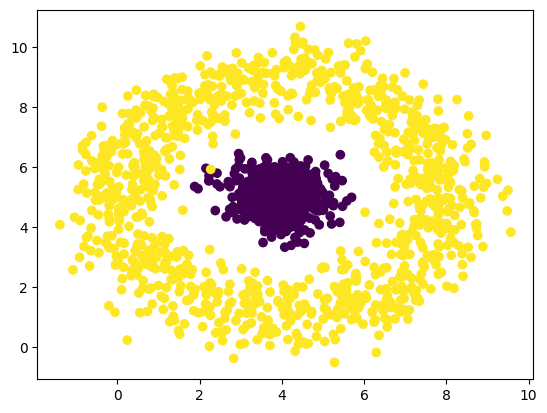

[[ 4.5163407   5.520836  ]
 [ 3.9349794   4.570367  ]
 [ 4.2815733   5.3131638 ]
 ...
 [ 6.5378437   1.9279827 ]
 [-0.20784229  3.341763  ]
 [ 4.511896   10.149174  ]] [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

print(inputs, targets)

## Method 1: TensorFlow, Ch. 3

**Creating the linear classifier variables**

In [ ]:
input_dim = 2
output_dim = 1
#W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))


W = tf.Variable([[4.1], [5.1]])
b = tf.Variable([[2.1]])

print(W, b)
print(W.shape, b.shape)
print(inputs.shape)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[4.1],
       [5.1]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.1]], dtype=float32)>
(2, 1) (1, 1)
(2000, 2)


**The forward pass function**

In [ ]:
def model(inputs):
    tmp = tf.reshape(tf.square(tf.norm(tf.transpose(W) - inputs, axis=1)), [num,1])
    return tf.math.sigmoid((tmp - b)*10)
    # return (tf.math.sign(tmp - b) + 1 ) / 2
    # return tf.matmul(inputs-np.transpose(W), np.transpose(inputs)-W)

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    print(W, b)
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
for step in range(4000):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Streaming output truncated to the last 5000 lines.
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.9125273],
       [5.048876 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.352336]], dtype=float32)>
Loss at step 2750: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.9125297],
       [5.048861 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3523805]], dtype=float32)>
Loss at step 2751: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.912532 ],
       [5.0488462]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.352425]], dtype=float32)>
Loss at step 2752: 0.0021
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.9125345],
       [5.0488315]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3524697]], dtype=float32)>
Loss at step 

In [ ]:
predictions = model(inputs)
# plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0]  )
# plt.show()

print(predictions)
print(predictions.shape)
print(targets.shape)

print('W=',W)
print('b=',b)


tf.Tensor(
[[8.4802673e-13]
 [1.5175827e-14]
 [1.6942455e-14]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]], shape=(2000, 1), dtype=float32)
(2000, 1)
(2000, 1)
W= <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.9111304],
       [5.0263424]], dtype=float32)>
b= <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3903897]], dtype=float32)>


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[3.9111304],
       [5.0263424]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.3903897]], dtype=float32)>
(100, 1)
(100, 1)


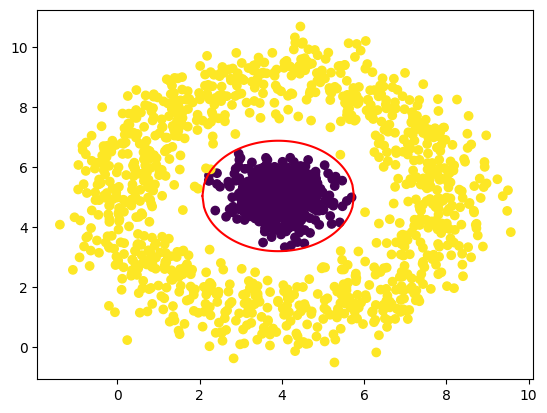

In [ ]:
R = np.sqrt(b)
x = np.linspace(W[0]-R, W[0]+R, 100)
y1 = W[1] + np.sqrt(R*R-(x-W[0])*(x-W[0]))
y2 = W[1] - np.sqrt(R*R-(x-W[0])*(x-W[0]))
x = np.reshape(x,[100,1])
y1 = np.reshape(y1,[100,1])
y2 = np.reshape(y2,[100,1])
plt.plot(x, y1, "-r", x, y2, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

print(W,b)
print(x.shape)
print(y1.shape)

## Method 2: Keras, Ch. 2

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(inputs, targets, epochs=4000, batch_size=2000)

Epoch 1/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step - accuracy: 0.5000 - loss: 0.6751
Epoch 2/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5765 - loss: 0.6984
Epoch 3/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.6214
Epoch 4/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7955 - loss: 0.5915
Epoch 5/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8750 - loss: 0.5739
Epoch 6/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8620 - loss: 0.5599
Epoch 7/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8830 - loss: 0.5474
Epoch 8/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8740 - loss: 0.5356
Epoch 9/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8835 - loss: 0.5246
Epoch 10/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8810 - loss: 0.5140
Epoch 11/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8870 - loss: 0.5040
Epoch 12/4000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accura

KeyboardInterrupt: 

In [ ]:
test_digits = Tinputs[0:5]
predictions = model.predict(test_digits)
print(predictions.shape)
predictions[1]

(5, 2)


array([1.0000000e+00, 8.3260066e-09], dtype=float32)

In [ ]:
predictions[1].argmax()

0

In [ ]:
predictions[1][0]

1.0

In [ ]:
Ttargets[1]

array([0.], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(Tinputs, Ttargets)
print(f"test_acc: {test_acc}")

63/63 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9995
test_acc: 0.9994999766349792


## Generating the decision map  (Larry 1/16/2022)

(100000, 2)


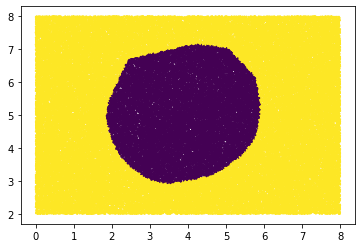

In [ ]:
import matplotlib.pyplot as plt

num_samples = 100000

x0 = np.random.uniform(0,8,num_samples)
y0 = np.random.uniform(2,8,num_samples)
FinalInputs = np.vstack((x0, y0)).astype(np.float32)
FinalInputs = np.transpose(FinalInputs)

print(FinalInputs.shape)

predictions = model.predict(FinalInputs)

plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=predictions[:, 1] > 0.5, s=1)
plt.show()

In [ ]:
from keras import backend as K

for w in model.trainable_weights:
    print(K.eval(w))

[[ 0.09807246  0.00905943 -0.08568715 ... -0.13000317  0.09307373
   0.01649563]
 [ 0.11098508  0.05650832 -0.06843792 ... -0.03626907  0.05296586
   0.0694574 ]]
[ 0.28146    -0.32053712  0.         -0.3933854  -0.01862766  0.29737106
 -0.31829733 -0.3056709  -0.04136493  0.29247713 -0.00324031  0.30520514
 -0.2169095  -0.3425611  -0.3179236   0.310246   -0.31608447  0.
  0.          0.30815378  0.28233418 -0.0030739   0.2866886  -0.43962002
  0.3012195   0.          0.28875118 -0.44291687 -0.40941188 -0.01546542
 -0.39817563  0.3149574   0.7052797  -0.44797626  0.         -0.3996336
 -0.25002486  0.29770124  0.          0.         -0.03878636  0.27926397
 -0.00696377  0.         -0.376538   -0.24541846 -0.06225657 -0.20081502
  0.28730196 -0.35151908  0.73806727 -0.4133487   0.          0.7387864
  0.2964087  -0.33351573  0.31373593 -0.31223336  0.30270025  0.3067179
 -0.40965545  0.29363918  0.28495014 -0.33861396 -0.447407    0.28502685
  0.29988527  0.         -0.00874343  0.28023

(1000000, 2)
(2, 1)
(1000000, 1)


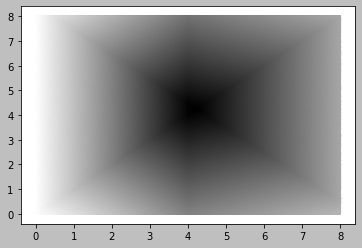

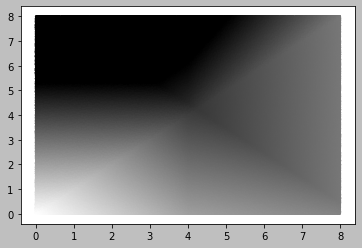

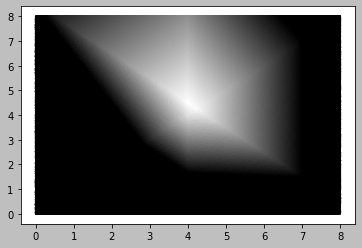

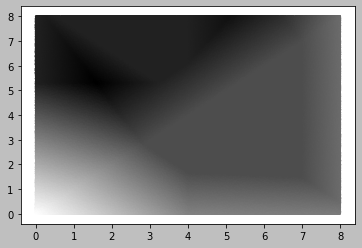

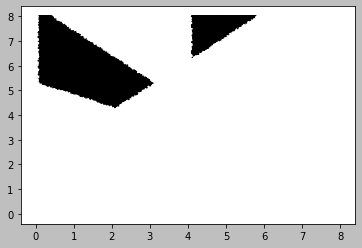

22.97684 5.754655


In [ ]:
import matplotlib.pyplot as plt

num_samples = 1000000

x0 = np.random.uniform(0,8,num_samples)
y0 = np.random.uniform(0,8,num_samples)
FinalInputs = np.vstack((x0, y0)).astype(np.float32)
FinalInputs = tf.transpose(FinalInputs)

print(FinalInputs.shape)

W1 = tf.constant(np.array([[1],
                            [0]]),
                            dtype=tf.float32)
W2 = tf.constant(np.array([[-0.707],
                            [0.707]]),
                            dtype=tf.float32)
W3 = tf.constant(np.array([[-0.707],
                            [-0.707]]),
                            dtype=tf.float32)

p1 = tf.math.maximum(0, tf.matmul(FinalInputs, W1) - 4)
p2 = tf.math.maximum(0, tf.matmul(FinalInputs, W2) + 0)
p3 = tf.math.maximum(0, tf.matmul(FinalInputs, W3) + 6)

p = p1 + p2 + p3


print(W1.shape)
print(p1.shape)

#print(predictions[:,0], predictions[:,1])
#plt.style.use('grayscale')
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p1[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p2[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p3[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]  , s=1)
#plt.show()
#plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]>2  , s=1)
#plt.show()

pA = tf.math.maximum(0,1 * p1 + 1 * p2 + 1 * p3 + 2)
pB = tf.math.maximum(0,1 * p1 - 2 * p2 + 2 * p3 + 3)
pC = tf.math.maximum(0,-2 * p1 - 1 * p2 - 3 * p3 + 6)

p = pA + pB + pC
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=pA[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=pB[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=pC[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]  , s=1)
plt.show()
plt.scatter(FinalInputs[:, 0], FinalInputs[:, 1], c=p[:, 0]>7.9  , s=1)
plt.show()

print(np.amax(p), np.amin(p))

In [ ]:
nx, ny = (2, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
yv


array([[0., 0.],
       [1., 1.]])

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 5ms/step - loss: 9.6050 - binary_accuracy: 0.5090
Epoch 2/5
16/16 [==============================] - 0s 5ms/step - loss: 9.1062 - binary_accuracy: 0.5095
Epoch 3/5
16/16 [==============================] - 0s 5ms/step - loss: 8.6878 - binary_accuracy: 0.5095
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 8.2859 - binary_accuracy: 0.5100
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 7.8952 - binary_accuracy: 0.5110


In [ ]:
history.history

{'loss': [9.604981422424316,
  9.10621166229248,
  8.687845230102539,
  8.28591251373291,
  7.895242214202881],
 'binary_accuracy': [0.5090000033378601,
  0.5095000267028809,
  0.5095000267028809,
  0.5099999904632568,
  0.5109999775886536]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0972 - binary_accuracy: 0.9543 - val_loss: 0.0455 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0752 - binary_accuracy: 0.9529 - val_loss: 0.0367 - val_binary_accuracy: 0.9900
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0755 - binary_accuracy: 0.9536 - val_loss: 0.2297 - val_binary_accuracy: 0.7283
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0657 - binary_accuracy: 0.9643 - val_loss: 0.0361 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0739 - binary_accuracy: 0.9543 - val_loss: 0.0576 - val_binary_accuracy: 0.9950


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.23570466]
 [-0.09319162]
 [-0.21924692]
 [ 0.9494563 ]
 [ 0.00919491]
 [-0.44920444]
 [ 0.03428194]
 [ 0.63351494]
 [ 1.1627355 ]
 [ 1.0470035 ]]


## Summary

In this notebook, we provide a concrete example illustrating that a two‐layer neural network (one hidden layer plus an output layer) can learn any partition of a finite region in the 2D plane. We construct a challenging dataset comprising two circular “islands” in the
(
𝑥
,
𝑦
)‐plane that belong to one class and everything else to another class. Despite the fact that these regions cannot be separated by a single linear boundary, a sufficiently large hidden layer allows the network to learn the decision boundary to high accuracy. This demonstrates the well‐known result that a single hidden layer is a universal approximator for classification boundaries on compact regions.

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6696 - loss: 0.5559 - val_accuracy: 0.9280 - val_loss: 0.2423
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9323 - loss: 0.2140 - val_accuracy: 0.9280 - val_loss: 0.1838
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9287 - loss: 0.1766 - val_accuracy: 0.9280 - val_loss: 0.1664
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9380 - loss: 0.1485 - val_accuracy: 0.9280 - val_loss: 0.1548
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9302 - loss: 0.1519 - val_accuracy: 0.9280 - val_loss: 0.1457
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9324 - loss: 0.1409 - val_accuracy: 0.9280 - val_loss: 0.1385
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9324 - loss: 0.1339 - val_accuracy: 0.9280 - val_loss: 0.1328
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9305 - loss: 0.1309 - val_accuracy: 0.

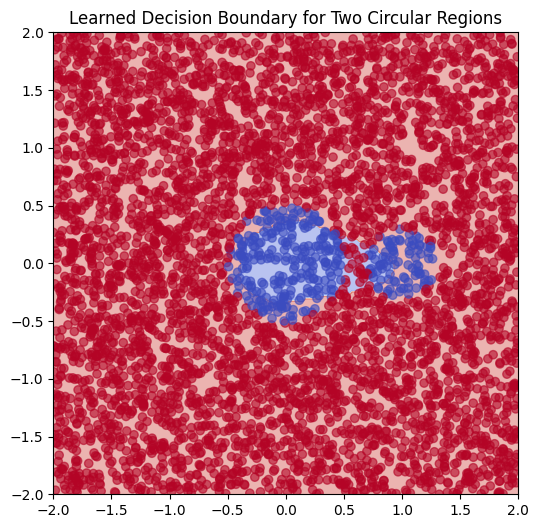

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Generate a challenging dataset
num_samples = 5000
X = np.random.uniform(-2, 2, (num_samples, 2))  # shape: [num_samples, 2]
y = np.zeros((num_samples,))                   # shape: [num_samples]

# Define two circular regions for class 0
r1 = 0.5
r2 = 0.3
center2 = (1.0, 0.0)

for i in range(num_samples):
    x, yv = X[i]
    # Check if (x, yv) is inside first circle OR second circle
    in_first_circle  = (x**2 + yv**2 <= r1**2)
    in_second_circle = ((x - center2[0])**2 + (yv - center2[1])**2 <= r2**2)
    if in_first_circle or in_second_circle:
        y[i] = 0
    else:
        y[i] = 1

# Convert y to one-hot
Y = tf.keras.utils.to_categorical(y, num_classes=2)

# 2. Build the model (two-layer network)
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(2,)))  # hidden layer
model.add(layers.Dense(2, activation='softmax'))                   # output layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train the model
model.fit(X, Y, epochs=20, batch_size=32, validation_split=0.2)

# 4. Visualize the decision boundary
grid_size = 200
x_lin = np.linspace(-2, 2, grid_size)
y_lin = np.linspace(-2, 2, grid_size)
xx, yy = np.meshgrid(x_lin, y_lin)
grid_points = np.c_[xx.ravel(), yy.ravel()]

pred_probs = model.predict(grid_points)
pred_classes = np.argmax(pred_probs, axis=1)
Z = pred_classes.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
# Overlay training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, alpha=0.6)
plt.title('Learned Decision Boundary for Two Circular Regions')
plt.show()